In [530]:
%matplotlib inline
from collections import defaultdict 
from __future__ import print_function
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import copy
import operator

In [531]:
# Actions
LEFT = (0, -1)
RIGHT = (0, 1)
UP = (-1, 0)
DOWN = (1, 0)
ACTIONS = [LEFT, RIGHT, UP, DOWN]
# State Table 
Q = defaultdict(dict)
# Grid Size 
M = 4
N = 12
CLIFF_REWARD = -20
# Epsilon Value for e-greedy policy 
EPSILON = 0.2
ALPHA = 0.1
GAMMA = 1
NO_OF_EPISODES = 600

In [532]:
def is_valid_state((i, j)):
    if i > M or j > N or i < 1 or j < 1:
        return False
    return True
def is_goal_state((i,j)):
    if i == M and j == N:
        return True
    return False
def is_cliff_state((i,j)):
    if i>= M-1 and i <= M and j >= 2 and j < N:
#     if i == M and j >= 2 and j < N:
        return True
    return False
def is_terminal_state((i,j)):
    return is_cliff_state((i,j)) or is_goal_state((i,j))

In [533]:
def init_Q():
    for i in range(1, M+1):
        for j in range(1, N+1):
            for action in ACTIONS:
                next_state = tuple(map(operator.add, (i,j), action))
                if is_valid_state(next_state):
                    Q[(i,j)][action] = 0 

In [534]:
def get_action_values_from_state(state):
    return Q[state]
    action_values = []
    actions = []
    for action in ACTIONS:
        next_state = tuple(map(operator.add, (i,j), action))
        if is_valid_state(next_state):
            action_values.append(Q[(i,j)][action]) 
            actions.append(action)
    return action_values, actions

In [535]:
def epsilon_greedy((i,j)):
    state = (i,j)
    valid_actions = Q[state].keys()
    max_action = max(Q[state], key=Q[state].get)
#     print('Max action is %s' % (max_action,))
    if random.random() < EPSILON:
        random_action = random.choice(valid_actions)
#         print('Chose %s' % (random_action,))
        return random_action
    max_action = max(Q[state], key=Q[state].get)
#     print('Chose %s' % (max_action,))
    return max_action

In [536]:
def take_action(S, A):
    next_state = tuple(map(operator.add, S, A))
    if is_cliff_state(next_state):
        reward = CLIFF_REWARD
    else:
        reward = -1
    return next_state, reward

In [537]:
def get_optimal_policy(Q):
    S = (M, 1) # How do u select this ?
    optimal_policy = [S]
    while not is_terminal_state(S):
        max_action = max(Q[S], key=Q[S].get)
        next_state, _ = take_action(S, max_action)
        print("Optimal Policy: Next State %s"%(next_state,))
        optimal_policy.append(next_state)
        S = next_state
    return optimal_policy

In [538]:
def print_optimal_policy(optimal_policy):
    for i in range(1, M+1):
        for j in range(1, N+1):
            state = (i,j)
            if (i,j) in optimal_policy:
                print('1\t', end="")
            elif is_cliff_state(state):
                print('C\t', end="")
            else:
                print('0\t', end="")
        print("")

In [539]:
def plot_episode_rewards(all_episode_rewards, legend_values):
    for episode_rewards in all_episode_rewards:
        plt.plot(episode_rewards)
    plt.ylabel('Total Rewards')
    plt.xlabel('Episodes')
    plt.legend(legend_values, loc='best')

In [540]:
def plot_episode_steps(episode_steps, legend_values):
    for episode_step in episode_steps:
        plt.plot(episode_step)
    plt.ylabel('Episode steps')
    plt.xlabel('Episodes')
    plt.legend(legend_values, loc='best')

In [541]:
def smooth_graph(yvalues):
    smooth_values = []
    for i in range(len(yvalues) - 10):
        l = yvalues[i:i+10]
        smooth_values.append(sum(l) / 10)
    return smooth_values
#     return yvalues

In [542]:
def sarsa():
    init_Q()
    episode_rewards = []
    episode_steps = []
    for i in range(NO_OF_EPISODES):
        print('Episode Start %s'%(i))
        S = (M, 1)
        A = epsilon_greedy(S)
        total_episode_reward = 0
        no_of_steps_per_episode = 0
        while not is_terminal_state(S):
#             print 'In state %s' % (S,)
            S_next, reward = take_action(S, A)
            total_episode_reward += reward
#             print 'Received Action %s' % (A,)
            A_next = epsilon_greedy(S_next)
            Q[S][A] = Q[S][A] + ALPHA*(reward + GAMMA*Q[S_next][A_next] - Q[S][A])
            S = S_next
            A = A_next
            no_of_steps_per_episode += 1
        episode_rewards.append(total_episode_reward)
        episode_steps.append(no_of_steps_per_episode)
#         print('Episode End')
    optimal_policy = get_optimal_policy(Q)
#     for state in Q.keys():
#         print("%s"%(state,))
#         print("%s"%(Q[state],))
#     print("%s"%episode_steps)
    return episode_rewards, optimal_policy, episode_steps

In [543]:
def qlearning():
    init_Q()
    episode_rewards = []
    episode_steps = []
    for i in range(NO_OF_EPISODES):
        print('Episode Start %s'%(i))
        S = (M, 1)
        total_episode_reward = 0
        no_of_steps_per_episode = 0
        while not is_terminal_state(S):
            A = epsilon_greedy(S)
            S_next, reward = take_action(S, A)
            total_episode_reward += reward
#             print((Q,))
#             print((S_next,))
            A_next = max(Q[S_next], key=Q[S_next].get)
            Q[S][A] = Q[S][A] + ALPHA*(reward + GAMMA*Q[S_next][A_next] - Q[S][A])
            S = S_next
            no_of_steps_per_episode += 1
        episode_rewards.append(total_episode_reward)
        episode_steps.append(no_of_steps_per_episode)
    optimal_policy = get_optimal_policy(Q)
#     for state in Q.keys():
#         print("%s"%(state,))
#         print("%s"%(Q[state],))
#     print("%s"%episode_steps)
    return episode_rewards, optimal_policy, episode_steps

In [544]:
episode_rewards_sarsa, optimal_policy_sarsa, episode_steps_sarsa = sarsa()
print('Optimal Policy using Sarsa')
print_optimal_policy(optimal_policy_sarsa)

Episode Start 0
Episode Start 1
Episode Start 2
Episode Start 3
Episode Start 4
Episode Start 5
Episode Start 6
Episode Start 7
Episode Start 8
Episode Start 9
Episode Start 10
Episode Start 11
Episode Start 12
Episode Start 13
Episode Start 14
Episode Start 15
Episode Start 16
Episode Start 17
Episode Start 18
Episode Start 19
Episode Start 20
Episode Start 21
Episode Start 22
Episode Start 23
Episode Start 24
Episode Start 25
Episode Start 26
Episode Start 27
Episode Start 28
Episode Start 29
Episode Start 30
Episode Start 31
Episode Start 32
Episode Start 33
Episode Start 34
Episode Start 35
Episode Start 36
Episode Start 37
Episode Start 38
Episode Start 39
Episode Start 40
Episode Start 41
Episode Start 42
Episode Start 43
Episode Start 44
Episode Start 45
Episode Start 46
Episode Start 47
Episode Start 48
Episode Start 49
Episode Start 50
Episode Start 51
Episode Start 52
Episode Start 53
Episode Start 54
Episode Start 55
Episode Start 56
Episode Start 57
Episode Start 58
Episode

In [545]:
episode_rewards_qlearn, optimal_policy_qlearn, episode_steps_qlearning = qlearning()
print('Optimal Policy using Q-Learning')
print_optimal_policy(optimal_policy_qlearn)


Episode Start 0
Episode Start 1
Episode Start 2
Episode Start 3
Episode Start 4
Episode Start 5
Episode Start 6
Episode Start 7
Episode Start 8
Episode Start 9
Episode Start 10
Episode Start 11
Episode Start 12
Episode Start 13
Episode Start 14
Episode Start 15
Episode Start 16
Episode Start 17
Episode Start 18
Episode Start 19
Episode Start 20
Episode Start 21
Episode Start 22
Episode Start 23
Episode Start 24
Episode Start 25
Episode Start 26
Episode Start 27
Episode Start 28
Episode Start 29
Episode Start 30
Episode Start 31
Episode Start 32
Episode Start 33
Episode Start 34
Episode Start 35
Episode Start 36
Episode Start 37
Episode Start 38
Episode Start 39
Episode Start 40
Episode Start 41
Episode Start 42
Episode Start 43
Episode Start 44
Episode Start 45
Episode Start 46
Episode Start 47
Episode Start 48
Episode Start 49
Episode Start 50
Episode Start 51
Episode Start 52
Episode Start 53
Episode Start 54
Episode Start 55
Episode Start 56
Episode Start 57
Episode Start 58
Episode

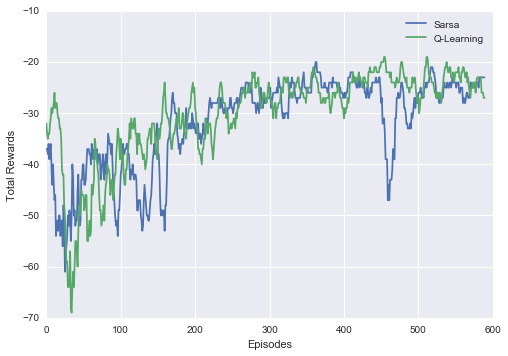

In [546]:
smooth_rewards_sarsa = smooth_graph(episode_rewards_sarsa)
smooth_rewards_qlearn = smooth_graph(episode_rewards_qlearn)
smooth_episodes_sarsa = smooth_graph(episode_steps_sarsa)
smooth_episodes_qlearn = smooth_graph(episode_steps_qlearning)
all_episode_rewards = [smooth_rewards_sarsa, smooth_rewards_qlearn]
all_episode_steps = [smooth_episodes_sarsa, smooth_episodes_qlearn]
legend_values = ["Sarsa", "Q-Learning"]
plot_episode_rewards(all_episode_rewards, legend_values)

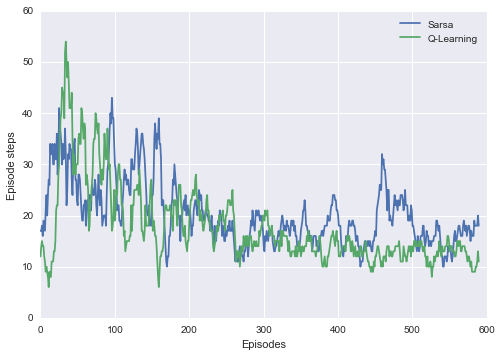

In [547]:
plot_episode_steps(all_episode_steps, legend_values)